In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: steveaoki
Your Kaggle Key: ··········


100%|██████████| 1.52G/1.52G [00:54<00:00, 29.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [24]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
data_dir = '/content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
dataset=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),seed=123)


In [26]:
label_to_class_name = dict(zip(range(len(dataset.class_names)), dataset.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

In [27]:
num_samples = len(dataset)
train_size = int(0.8 * num_samples)
val_size = num_samples - train_size

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

val_size = int(0.9 * val_size)
test_size = num_samples - train_size - val_size

val_dataset = val_dataset.take(val_size)
test_dataset = dataset.skip(train_size + val_size)

train_dataset = train_dataset.shuffle(buffer_size=train_size).batch(batch_size)
val_dataset = val_dataset.shuffle(buffer_size=val_size).batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=test_size).batch(batch_size)

print(dataset)
print(train_dataset)
print(val_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>


In [28]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
print("-------------------")
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 32, 150, 150, 3)
(32, 32)
-------------------
(32, 150, 150, 3)
(32,)


In [29]:
train_dataset=train_dataset.map(lambda x,y:(x/255,y))
val_dataset=val_dataset.map(lambda x,y:(x/255,y))
test_dataset=test_dataset.map(lambda x,y:(x/255,y))

print(train_dataset)

<_MapDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

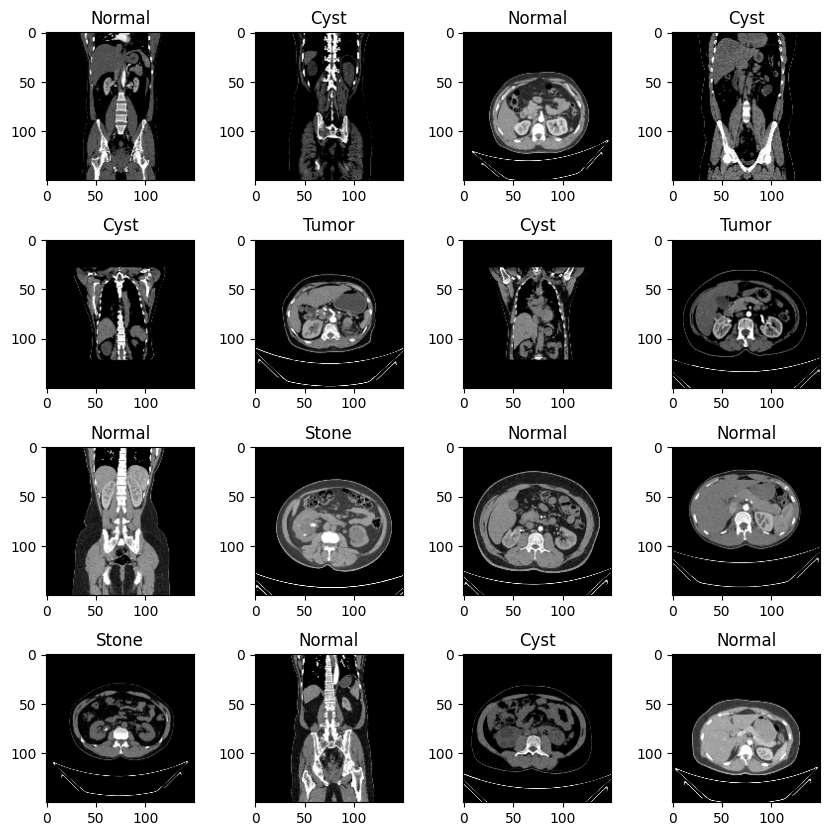

In [31]:
data_iterator = dataset.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()